## Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


## 1. Add noise

In [3]:
# Noise is added here
# The max value of the noise should not grossly surpass 1.0
noise_train = np.random.normal(0.5, 0.05, (60000, 784))
noise_test = np.random.normal(0.5, 0.05, (10000, 784))
x_train2 = x_train + noise_train
x_test2 = x_test + noise_test

In [4]:
print(np.max(noise_train))
print(np.min(noise_train))
print(np.max(noise_test))
print(np.min(noise_test))

0.7830082232198076
0.22467636179369982
0.7592332878380708
0.24213990810377145


## 2. Compare Accuracy

### 2-A. Accuracy without noise = 98.23%

In [5]:
batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1/20


469/4

### 2-B. Accuracy with noise = 97.93%

In [6]:
# With noise

history2 = model.fit(x_train2, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test2, y_test))
score2 = model.evaluate(x_test2, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Epoch 1/20
469/469 [==============================] - 12s 24ms/step - loss: 0.2634 - accuracy: 0.9195 - val_loss: 0.1166 - val_accuracy: 0.9648
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1521 - accuracy: 0.9517 - val_loss: 0.1021 - val_accuracy: 0.9677
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1308 - accuracy: 0.9577 - val_loss: 0.0938 - val_accuracy: 0.9702
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1170 - accuracy: 0.9624 - val_loss: 0.0937 - val_accuracy: 0.9719
Epoch 5/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1094 - accuracy: 0.9648 - val_loss: 0.0827 - val_accuracy: 0.9744
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1025 - accuracy: 0.9668 - val_loss: 0.0832 - val_accuracy: 0.9745
Epoch 7/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0997 - accuracy: 0.9673 - val_loss: 0.0937 - val_accuracy: 

### Result: Accuracy dropped by 0.30%p due to the noise

## 3. Vary noises

In [7]:
accuracy_score = []
noise_scale = [.1, .5, 1.0, 2.0, 4.0]

#set for loop to see scores for each scale of noise
for scale in noise_scale:
    
    noise_train = np.random.normal(0.5, scale, (60000, 784))
    noise_test = np.random.normal(0.5, scale, (10000, 784))
    x_train3 = x_train + noise_train
    x_test3 = x_test + noise_test
    
    history3 = model.fit(x_train3, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test3, y_test))
    
    score3 = model.evaluate(x_test3, y_test, verbose=0)
    accuracy = score3[1]
    accuracy_score.append(accuracy)

Epoch 1/20
469/469 [==============================] - 15s 31ms/step - loss: 0.0895 - accuracy: 0.9705 - val_loss: 0.0724 - val_accuracy: 0.9790
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0831 - accuracy: 0.9725 - val_loss: 0.0710 - val_accuracy: 0.9783
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0799 - accuracy: 0.9736 - val_loss: 0.0833 - val_accuracy: 0.9751
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0773 - accuracy: 0.9744 - val_loss: 0.0678 - val_accuracy: 0.9804
Epoch 5/20
469/469 [==============================] - 10s 20ms/step - loss: 0.0771 - accuracy: 0.9744 - val_loss: 0.0796 - val_accuracy: 0.9778
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0694 - accuracy: 0.9771 - val_loss: 0.0729 - val_accuracy: 0.9782
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0731 - accuracy: 0.9755 - val_loss: 0.0737 - val_accuracy: 0

Epoch 18/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1985 - accuracy: 0.9319 - val_loss: 0.9381 - val_accuracy: 0.7816
Epoch 19/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1887 - accuracy: 0.9361 - val_loss: 0.9372 - val_accuracy: 0.7787
Epoch 20/20
469/469 [==============================] - 9s 18ms/step - loss: 0.1811 - accuracy: 0.9387 - val_loss: 0.9556 - val_accuracy: 0.7794
Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 1.9382 - accuracy: 0.3638 - val_loss: 1.5751 - val_accuracy: 0.4667
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 1.6225 - accuracy: 0.4441 - val_loss: 1.5169 - val_accuracy: 0.4921
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 1.5166 - accuracy: 0.4791 - val_loss: 1.4904 - val_accuracy: 0.5000
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 1.4156 - accuracy: 0.5105 - val_loss: 1.4955 - val_accuracy: 0

In [8]:
print(accuracy_score)

[0.9778000116348267, 0.9319999814033508, 0.7793999910354614, 0.44780001044273376, 0.22589999437332153]


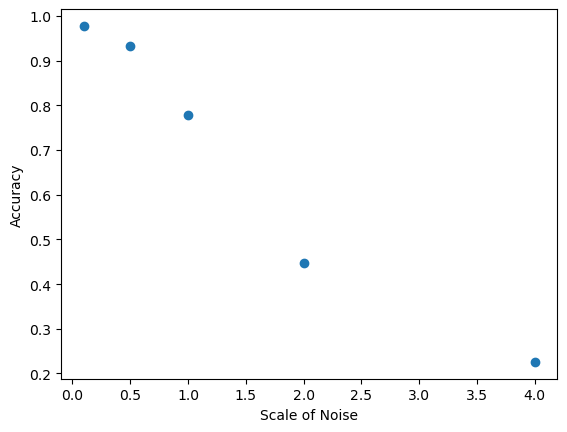

In [9]:
plt.scatter(noise_scale, accuracy_score)
plt.xlabel('Scale of Noise')
plt.ylabel('Accuracy')
plt.show()

## Result: The accuracy significantly dropped as scale of noise increased